In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
sns.set()

In [3]:
df=pd.read_excel('./Data_Train (2).xlsx')

In [4]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [5]:
df.shape

(6019, 12)

In [6]:
df.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(5975, 12)

In [9]:
df.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
6013,Honda Amaze VX i-DTEC,Coimbatore,2015,70602,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,4.83
1093,Audi Q7 4.2 TDI Quattro Technology,Bangalore,2014,50000,Diesel,Automatic,First,11.33 kmpl,4134 CC,335.2 bhp,7.0,51.00
2258,BMW 5 Series 2003-2012 520d,Mumbai,2013,78000,Diesel,Automatic,First,18.48 kmpl,1995 CC,177 bhp,5.0,19.50
2001,Skoda Octavia 1.9 TDI,Pune,2008,88123,Diesel,Manual,First,18.7 kmpl,1896 CC,66 bhp,5.0,2.20
1966,Maruti Swift LDI,Delhi,2015,51000,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,4.74
4013,Mahindra XUV500 W10 2WD,Jaipur,2017,40000,Diesel,Manual,First,16.0 kmpl,2179 CC,140 bhp,7.0,15.90
3620,Skoda Rapid 1.6 TDI Elegance,Hyderabad,2013,93000,Diesel,Manual,First,20.5 kmpl,1598 CC,103.5 bhp,5.0,5.00
4252,Hyundai EON Era Plus,Coimbatore,2015,34063,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,4.01
3762,Skoda Superb Elegance 1.8 TSI AT,Mumbai,2009,35000,Petrol,Automatic,Second,13.7 kmpl,1798 CC,157.75 bhp,5.0,4.45
3830,Toyota Fortuner 4x2 AT,Delhi,2014,79000,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.5 bhp,7.0,17.75


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


In [11]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,5.278828,9.501647
std,3.247238,9.155851e+04,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2012.000000,3.390800e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.650000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [12]:
df['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [13]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [14]:
df[df['Owner_Type']=='Fourth & Above']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262000,Diesel,Manual,Fourth & Above,12.8 kmpl,2494 CC,102 bhp,7.0,4.00
885,Maruti Grand Vitara AT,Chennai,2008,77000,Petrol,Automatic,Fourth & Above,9.7 kmpl,1995 CC,163.5 bhp,5.0,5.50
1081,Hyundai i20 1.2 Sportz Option,Bangalore,2010,61000,Petrol,Manual,Fourth & Above,17.0 kmpl,1197 CC,80 bhp,5.0,3.25
1699,Ford Endeavour 4x2 XLT Limited Edition,Pune,2007,90000,Diesel,Manual,Fourth & Above,10.9 kmpl,2499 CC,143 bhp,7.0,3.00
2988,Toyota Innova 2.5 G4 Diesel 8-seater,Chennai,2005,240000,Diesel,Manual,Fourth & Above,12.8 kmpl,2494 CC,102 bhp,8.0,5.10
3368,Maruti Swift Ldi BSIII,Pune,2009,80000,Diesel,Manual,Fourth & Above,17.8 kmpl,1248 CC,75 bhp,5.0,2.15
4148,Ford Ikon 1.3 Flair,Coimbatore,2008,59833,Petrol,Manual,Fourth & Above,13.8 kmpl,1299 CC,70 bhp,5.0,1.97
5647,Toyota Qualis Fleet A3,Mumbai,2001,227000,Diesel,Manual,Fourth & Above,0.0 kmpl,2446 CC,null bhp,8.0,2.20


In [15]:
df.corr()

,Year,Kilometers_Driven,Seats,Price
Year,1.000000,-0.172663,0.012338,0.305800
Kilometers_Driven,-0.172663,1.000000,0.083101,-0.011263
Seats,0.012338,0.083101,1.000000,0.052262
Price,0.305800,-0.011263,0.052262,1.000000


In [16]:
pd.get_dummies(df['Owner_Type'])

,First,Fourth & Above,Second,Third
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
6014,1,0,0,0
6015,1,0,0,0
6016,0,0,1,0
6017,1,0,0,0


In [17]:
df['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [18]:
df['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., 10.,  9.,  0.])

In [19]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [20]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


# Task
1. change power to float
2. change engine to int/float
3. change mileage to float
4. Change owner type to categorical
5. change Transmission  to categorical
6. Change Fuel_type to categorical
7. Derive brand, model from name
8. draw different plots

In [21]:
power_list = list(df['Power'])

In [22]:
power=[]

In [23]:
#power_list

In [24]:
for name in power_list:
    power.append(name.split()[0])

In [25]:
df['Power'] = power

In [26]:
df = df[df['Power'] != 'null' ]

In [27]:
df.shape

(5872, 12)

In [28]:
df['Power'] = df['Power'].astype('float')

In [29]:
engine_list = list(df['Engine'])

In [30]:
engine = []

In [31]:
for name in engine_list:
    engine.append(name.split(' ')[0])

In [32]:
df['Engine'] = engine

In [33]:
df['Engine'] = df['Engine'].astype('float')

In [34]:
mileage_list = list(df['Mileage'])

In [35]:
unique_unit = []

In [36]:
for x in mileage_list:
    unit = x.split(' ')[1]
    if unit not in unique_unit:
        unique_unit.append(unit)

In [37]:
unique_unit

['km/kg', 'kmpl']

1 kg = 1 l
<br>So unit km/kg and kmpl are equal</br>

In [38]:
mileage = []

In [39]:
for x in mileage_list:
    mileage.append(x.split(' ')[0])

In [40]:
df['Mileage'] = mileage

In [41]:
df['Mileage'] = df['Mileage'].astype('float')

In [42]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [43]:
def owner_numerical(x):
    if (x == 'First'):
        return 1
    elif (x == 'Second'):
        return 2
    elif (x == 'Third'):
        return 3
    elif (x == 'Fourth & Above'):
        return 4

In [44]:
df['Owner_Type_Numerical'] = df['Owner_Type'].apply(owner_numerical)

In [45]:
def Transmission_numerical(x):
    if (x == 'Manual'):
        return 0
    elif (x == 'Automatic'):
        return 1

In [46]:
df['Transmission_Numerical'] = df['Transmission'].apply(Transmission_numerical)

In [47]:
df = df[df['Kilometers_Driven'] <= 6000000]

In [48]:
df=df[df['Mileage'] != 0]

In [49]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Owner_Type_Numerical,Transmission_Numerical
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,1,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,1,0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,1,0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,1,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,2,1


In [50]:
df['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [51]:
def fuel_type_numerical(x):
    if (x == 'CNG'):
        return 0
    elif (x == 'Diesel'):
        return 1
    elif (x == 'Petrol'):
        return 2
    elif (x == 'LPG'):
        return 3

In [52]:
df['Fuel_Type_Numerical'] = df['Fuel_Type'].apply(fuel_type_numerical)

In [53]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Owner_Type_Numerical,Transmission_Numerical,Fuel_Type_Numerical
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,1,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,1,0,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,1,0,2
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,1,0,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,2,1,1


In [54]:
car_name = []
unique_car_brand = []

In [55]:
car_name = list(df['Name'])

In [56]:
car_name

['Maruti Wagon R LXI CNG',
 'Hyundai Creta 1.6 CRDi SX Option',
 'Honda Jazz V',
 'Maruti Ertiga VDI',
 'Audi A4 New 2.0 TDI Multitronic',
 'Hyundai EON LPG Era Plus Option',
 'Nissan Micra Diesel XV',
 'Toyota Innova Crysta 2.8 GX AT 8S',
 'Volkswagen Vento Diesel Comfortline',
 'Tata Indica Vista Quadrajet LS',
 'Maruti Ciaz Zeta',
 'Honda City 1.5 V AT Sunroof',
 'Maruti Swift VDI BSIV',
 'Land Rover Range Rover 2.2L Pure',
 'Mitsubishi Pajero Sport 4X4',
 'Honda Amaze S i-Dtech',
 'Maruti Swift DDiS VDI',
 'Renault Duster 85PS Diesel RxL Plus',
 'Mercedes-Benz New C-Class C 220 CDI BE Avantgare',
 'BMW 3 Series 320d',
 'Maruti S Cross DDiS 200 Alpha',
 'Audi A6 2011-2015 35 TFSI Technology',
 'Hyundai i20 1.2 Magna',
 'Volkswagen Vento Petrol Highline AT',
 'Honda City Corporate Edition',
 'Nissan Micra Diesel XV',
 'Maruti Alto K10 2010-2014 VXI',
 'Honda WRV i-VTEC VX',
 'Toyota Innova 2.5 V Diesel 7-seater',
 'Renault Duster 110PS Diesel RxZ Pack',
 'Toyota Corolla Altis G',
 'M

In [57]:
for x in car_name:
    brand = (x.split(' ')[0])
    if brand not in unique_car_brand:
        unique_car_brand.append(brand)
        

In [58]:
unique_car_brand

['Maruti',
 'Hyundai',
 'Honda',
 'Audi',
 'Nissan',
 'Toyota',
 'Volkswagen',
 'Tata',
 'Land',
 'Mitsubishi',
 'Renault',
 'Mercedes-Benz',
 'BMW',
 'Mahindra',
 'Ford',
 'Porsche',
 'Datsun',
 'Jaguar',
 'Volvo',
 'Chevrolet',
 'Skoda',
 'Mini',
 'Fiat',
 'Jeep',
 'Ambassador',
 'ISUZU',
 'Force',
 'Bentley',
 'Lamborghini']

In [59]:
brand=[]

In [60]:
for x in df['Name']:
    brand.append(x.split(' ')[0])

In [61]:
df.insert(loc = 0, column = 'Brand', value=brand, allow_duplicates=True)

In [62]:
df.head()

,Brand,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Owner_Type_Numerical,Transmission_Numerical,Fuel_Type_Numerical
0,Maruti,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,1,0,0
1,Hyundai,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,1,0,1
2,Honda,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,1,0,2
3,Maruti,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,1,0,1
4,Audi,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,2,1,1


In [63]:
df['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [64]:
df['Brand'] = df['Brand'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Year'] = df['Year'].astype('category')

In [65]:
df['Brand_Categorical'] = df['Brand'].cat.codes
df['Location_Categorical'] = df['Location'].cat.codes
df['Year_Categorical'] = df['Year'].cat.codes


In [66]:
by_brand = df.groupby('Brand').mean()

In [67]:
#by_brand.drop(['Year', 'Fuel_Type', 'Transmission','Owner_Type','Seats'], axis = 1, inplace=True)

In [68]:
by_brand.sort_values(by='Price', ascending=False)

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Owner_Type_Numerical,Transmission_Numerical,Fuel_Type_Numerical,Brand_Categorical,Location_Categorical,Year_Categorical
Brand,,,,,,,,,,,,
Lamborghini,6500.000000,6.400000,5204.000000,560.000000,2.000000,120.000000,3.000000,1.000000,2.000000,14.0,4.000000,13.000000
Bentley,48000.000000,8.600000,5998.000000,552.000000,4.000000,59.000000,1.000000,1.000000,2.000000,3.0,5.000000,8.000000
Porsche,43927.625000,14.080000,3485.125000,331.287500,4.312500,49.204375,1.375000,1.000000,1.312500,22.0,5.875000,15.562500
Land,55036.450980,12.893137,2510.627451,198.378824,5.450980,42.526078,1.254902,1.000000,1.000000,15.0,4.725490,16.705882
Jaguar,36380.725000,14.955750,2623.150000,239.075250,4.850000,37.632250,1.100000,1.000000,1.100000,12.0,5.425000,16.400000
Mini,24890.307692,18.593846,1766.615385,147.438462,4.423077,26.896923,1.230769,0.961538,1.500000,19.0,6.346154,17.076923
Mercedes-Benz,48835.467105,14.432829,2363.108553,194.367796,5.046053,26.483783,1.184211,0.947368,1.256579,18.0,5.434211,15.513158
Audi,52999.628205,15.256581,2274.918803,191.895385,5.286325,25.559402,1.205128,1.000000,1.076923,1.0,4.602564,15.628205
BMW,54871.655172,16.965057,2320.655172,209.635249,4.954023,25.288046,1.249042,1.000000,1.107280,2.0,5.340996,15.068966


In [69]:
by_brand.sort_values(by='Price', ascending=False)['Price'].iplot()

In [70]:
by_brand.sort_values(by='Mileage', ascending=False)['Mileage'].iplot()

In [71]:
by_brand.sort_values(by='Engine', ascending=False)['Engine'].iplot()

In [72]:
by_brand.sort_values(by='Power', ascending=False)['Power'].iplot()

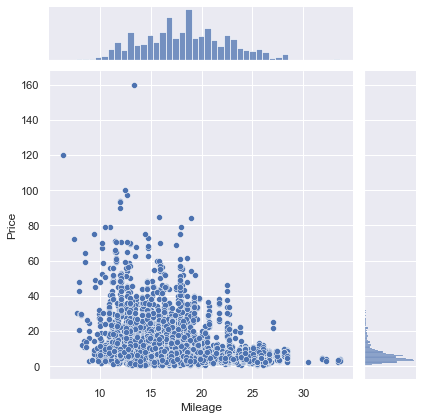

In [73]:
sns.jointplot(x='Mileage', y='Price', data=df)

In [74]:
by_location = df.groupby('Location').mean()

In [75]:
by_location.sort_values(by='Price', ascending=False, inplace=True)

In [76]:
by_location

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Owner_Type_Numerical,Transmission_Numerical,Fuel_Type_Numerical,Brand_Categorical,Location_Categorical,Year_Categorical
Location,,,,,,,,,,,,
Coimbatore,47025.744409,17.986725,1718.348243,125.266414,5.306709,14.998642,1.108626,0.389776,1.440895,13.635783,3.0,17.439297
Bangalore,58228.871720,17.130233,1820.489796,132.660816,5.341108,13.496122,1.387755,0.411079,1.387755,13.282799,1.0,14.906706
Kochi,44793.569207,18.743437,1583.802488,114.748398,5.213064,11.206734,1.057543,0.315708,1.503888,13.886470,7.0,17.550544
Hyderabad,70674.842917,18.836438,1630.934081,108.802370,5.336606,9.901851,1.110799,0.263675,1.305750,15.311360,5.0,14.821879
Delhi,57143.836096,17.967035,1712.104972,120.224291,5.375691,9.782505,1.180479,0.309392,1.410681,15.162063,4.0,15.381215
Mumbai,44533.130660,17.495977,1665.887451,121.415006,5.274256,9.408124,1.182406,0.381630,1.562743,14.758085,9.0,15.404916
Ahmedabad,55295.779817,19.195413,1579.472477,109.349404,5.279817,8.329037,1.165138,0.256881,1.353211,14.444954,0.0,15.357798
Chennai,76974.166667,18.323101,1630.151899,107.948523,5.320675,7.786118,1.388186,0.246835,1.394515,15.149789,2.0,14.084388
Pune,69385.142373,18.280729,1547.762712,103.797356,5.276271,6.803983,1.367797,0.235593,1.494915,15.457627,10.0,14.472881


In [77]:
by_location['Price'].iplot()

In [78]:
by_year = df.groupby('Year').mean()

In [79]:
#by_year.sort_values(by='Price', ascending=False, inplace=True)

In [80]:
by_year

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Owner_Type_Numerical,Transmission_Numerical,Fuel_Type_Numerical,Brand_Categorical,Location_Categorical,Year_Categorical
Year,,,,,,,,,,,,
1998,81866.666667,14.866667,1260.666667,92.566667,5.000000,1.626667,2.333333,0.333333,1.666667,17.333333,7.000000,0.0
1999,105000.000000,15.150000,1168.000000,75.000000,5.000000,0.835000,1.500000,0.000000,2.000000,13.000000,8.000000,1.0
2000,112500.000000,15.267500,1817.000000,60.775000,5.750000,1.175000,1.500000,0.000000,1.500000,18.750000,7.250000,2.0
2001,124985.750000,15.050000,1385.500000,86.950000,5.000000,0.975000,2.500000,0.000000,2.000000,12.250000,6.000000,3.0
2002,78664.636364,16.536364,1319.727273,61.372727,5.272727,1.273636,2.000000,0.000000,1.727273,17.545455,4.636364,4.0
2003,84404.357143,15.464286,1478.071429,82.000000,5.142857,1.697857,1.928571,0.071429,1.785714,16.071429,5.785714,5.0
2004,94115.480000,14.843200,1532.840000,93.748000,5.320000,2.012000,1.840000,0.240000,1.880000,15.520000,5.880000,6.0
2005,92324.309524,14.013095,1812.500000,105.576190,5.571429,2.290952,1.595238,0.214286,1.619048,17.238095,5.738095,7.0
2006,100309.500000,15.123485,1757.954545,109.868182,5.409091,3.673485,1.681818,0.151515,1.712121,14.742424,5.363636,8.0


In [81]:
by_year['Price'].iplot()

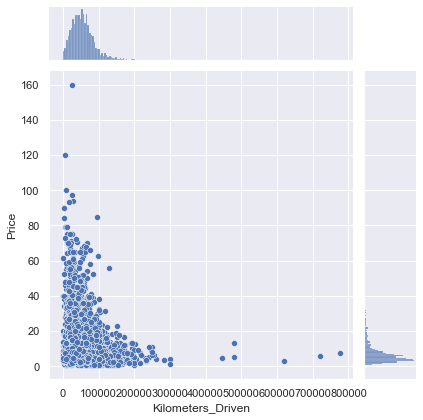

In [82]:
sns.jointplot(x='Kilometers_Driven', y='Price', data=df)

In [83]:
#df[df['Kilometers_Driven'] > 6000000]

In [84]:
#df[df['Brand']=='BMW']

In [85]:
by_fuel_type = df.groupby('Fuel_Type').mean()

In [86]:
by_fuel_type.sort_values(by='Price', ascending=False, inplace=True)

In [87]:
by_fuel_type

,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Owner_Type_Numerical,Transmission_Numerical,Fuel_Type_Numerical,Brand_Categorical,Location_Categorical,Year_Categorical
Fuel_Type,,,,,,,,,,,,
Diesel,65447.162145,18.781612,1861.881264,127.701296,5.518353,12.841669,1.178104,0.344718,1.0,14.931376,5.260453,15.797319
Petrol,47528.227221,17.719641,1352.472968,97.042299,5.015123,5.771429,1.215879,0.226843,2.0,14.233648,6.008318,15.100945
CNG,54635.981818,25.571091,1091.145455,64.830909,5.036364,3.558909,1.181818,0.000000,0.0,17.072727,7.054545,16.163636
LPG,59966.200000,19.385000,1027.400000,59.915000,5.000000,2.487000,1.200000,0.000000,3.0,13.500000,6.100000,12.800000


In [88]:
by_fuel_type['Price'].iplot(kind='bar')

In [89]:
by_transmission = df.groupby('Transmission').mean()

In [90]:
by_transmission['Price'].iplot(kind='bar')

In [91]:
by_owner_type = df.groupby('Owner_Type').mean()

In [92]:
by_owner_type.sort_values(by='Price', ascending=False, inplace=True)

In [93]:
by_owner_type['Price'].iplot(kind='bar')

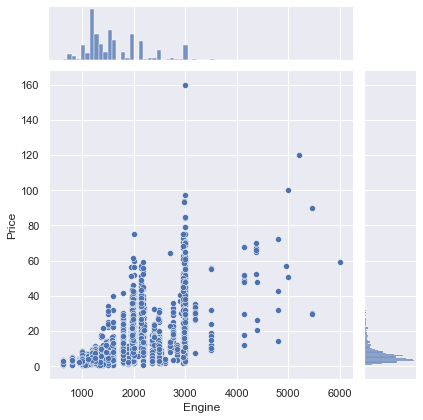

In [94]:
sns.jointplot(x='Engine', y='Price', data=df)

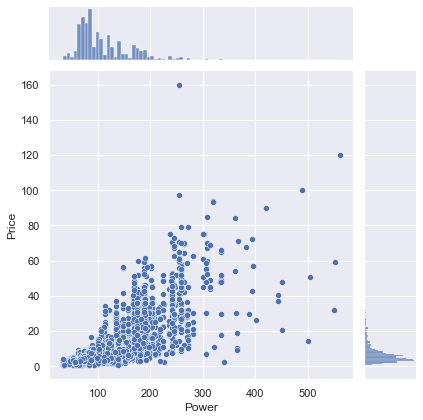

In [95]:
sns.jointplot(x='Power', y='Price', data=df)

In [96]:
by_seats = df.groupby('Seats').mean()

In [97]:
by_seats['Price'].iplot(kind='bar')

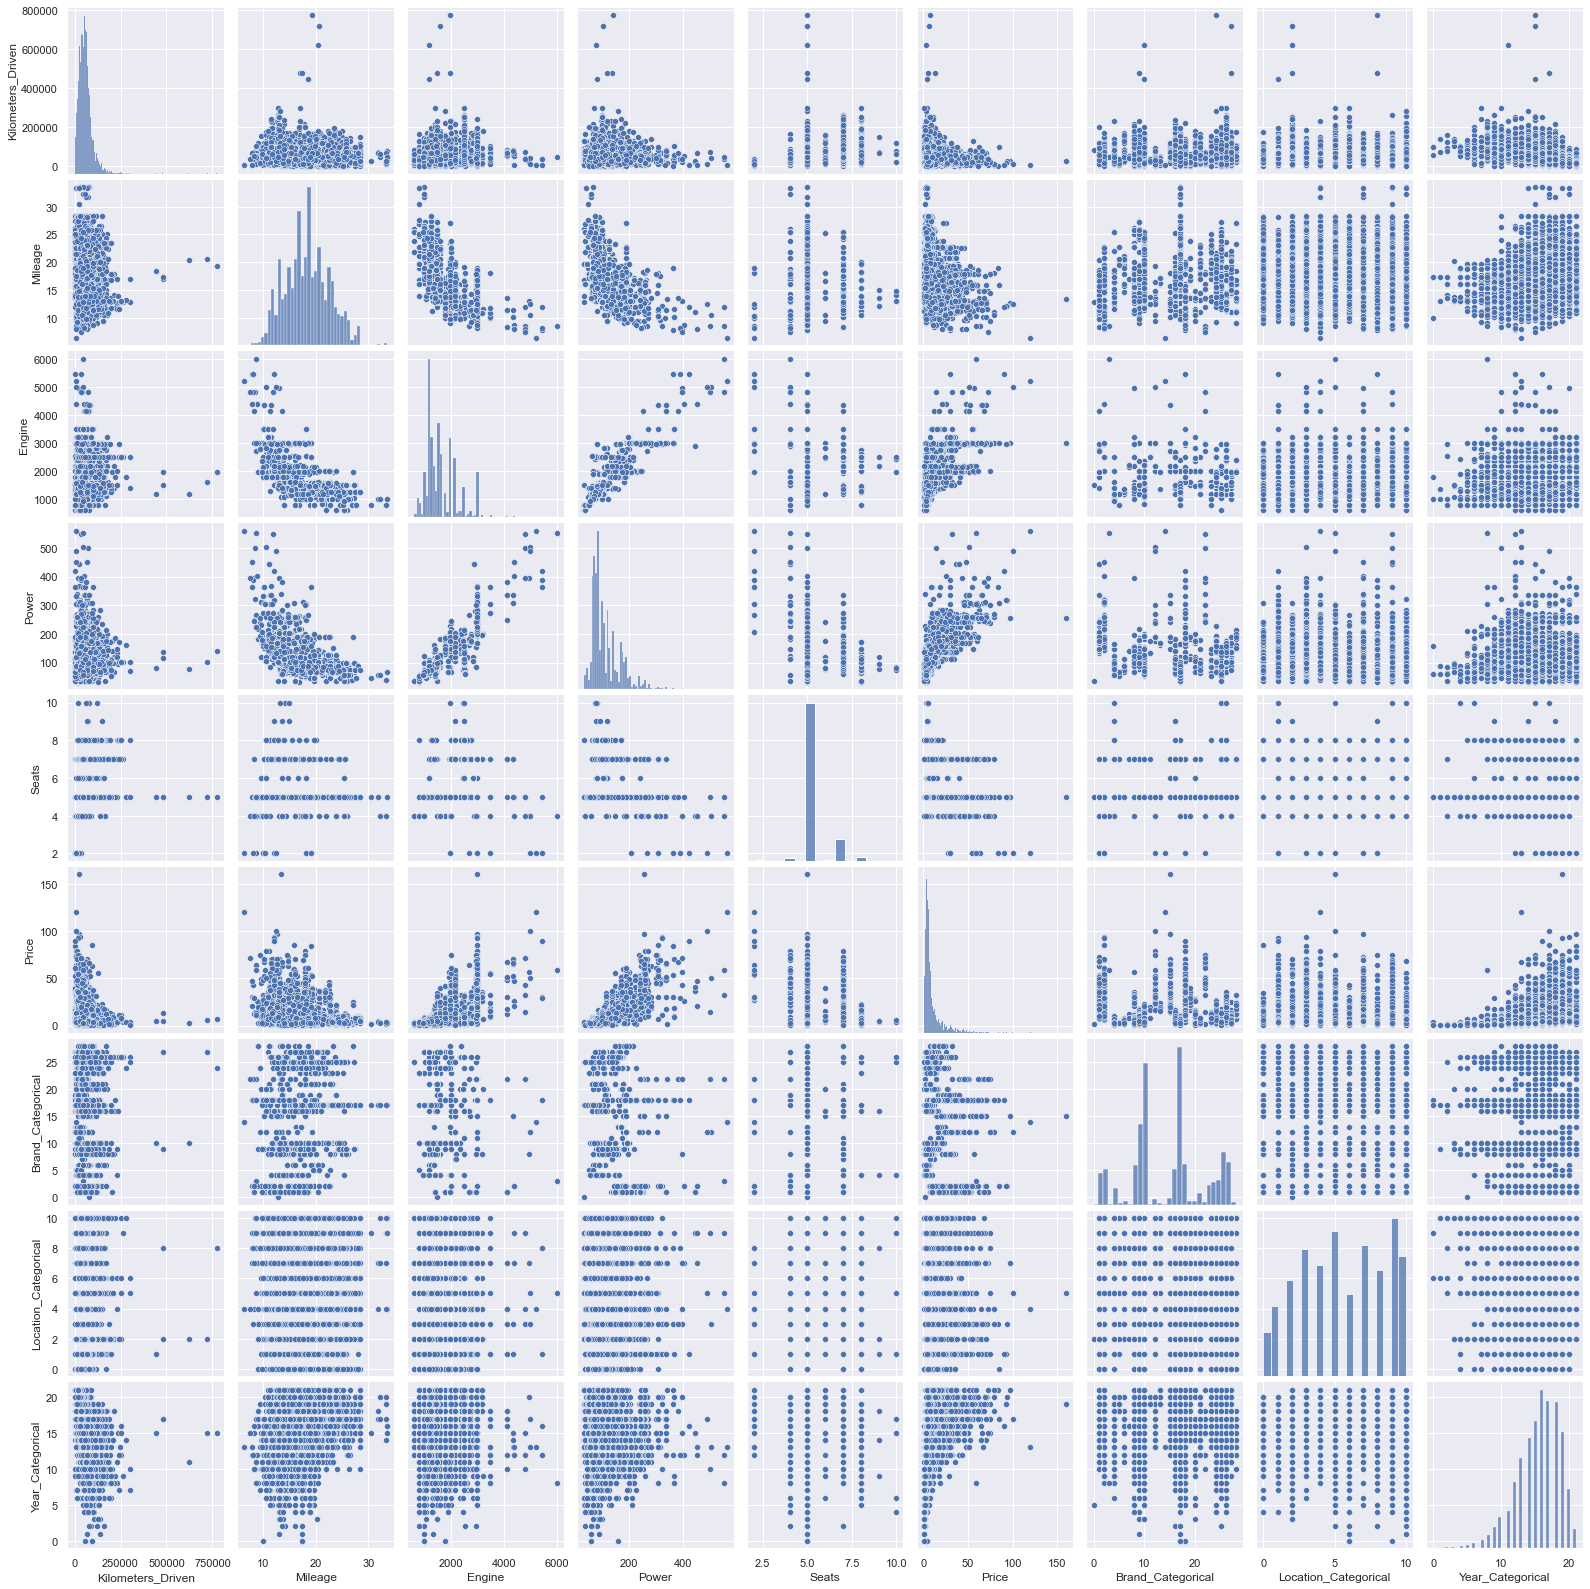

In [98]:
sns.pairplot(data=df.drop(['Fuel_Type_Numerical','Owner_Type_Numerical','Transmission_Numerical'], axis=1))

## Model Traning

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [101]:
lr = LinearRegression()

In [102]:
svr = SVR()

In [103]:
rfr = RandomForestRegressor()

In [104]:
gbr = GradientBoostingRegressor()

In [105]:
dtr = DecisionTreeRegressor()

In [106]:
knr = KNeighborsRegressor()

In [107]:
models = [lr, svr, rfr, gbr, dtr, knr]

In [108]:
model_str = ['lr', 'svr' ,'rfr', 'gbr' ,' dtr', 'knr']

In [109]:
df.columns

Index(['Brand', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Owner_Type_Numerical', 'Transmission_Numerical',
       'Fuel_Type_Numerical', 'Brand_Categorical', 'Location_Categorical',
       'Year_Categorical'],
      dtype='object')

In [110]:
data = df[['Brand_Categorical', 'Location_Categorical', 'Year_Categorical', 'Kilometers_Driven', 'Fuel_Type_Numerical', 'Transmission_Numerical', 'Owner_Type_Numerical', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]

In [111]:
data

,Brand_Categorical,Location_Categorical,Year_Categorical,Kilometers_Driven,Fuel_Type_Numerical,Transmission_Numerical,Owner_Type_Numerical,Mileage,Engine,Power,Seats,Price
0,17,9,12,72000,0,0,1,26.60,998.0,58.16,5.0,1.75
1,10,10,17,41000,1,0,1,19.67,1582.0,126.20,5.0,12.50
2,9,2,13,46000,2,0,1,18.20,1199.0,88.70,5.0,4.50
3,17,2,14,87000,1,0,1,20.77,1248.0,88.76,7.0,6.00
4,1,3,15,40670,1,1,2,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,17,4,16,27365,1,0,1,28.40,1248.0,74.00,5.0,4.75
6015,10,6,17,100000,1,0,1,24.40,1120.0,71.00,5.0,4.00
6016,16,6,14,55000,1,0,2,14.00,2498.0,112.00,8.0,2.90
6017,17,8,15,46000,2,0,1,18.90,998.0,67.10,5.0,2.65


In [112]:
X = data.drop('Price', axis=1)
y = data['Price']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [114]:
lr.fit(X_train, y_train)

LinearRegression()

In [115]:
lr.score(X_test,  y_test)

0.6738126541388649

In [116]:
for model, model_name in zip(models,  model_str):
    model.fit(X_train,  y_train)
    print(model_name+ ' : ' +str(model.score(X_test, y_test)))

lr : 0.6738126541388649
svr : -0.057284779098351724
rfr : 0.8442531606436705
gbr : 0.8597270572162689
 dtr : 0.7960329004224621
knr : 0.5129666921553948


### We can see that random forest reggressor, gradient boosting regressor,  and decision tree regressor are performing quite well. So, we can tune their hyperparameters

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, SCORERS

In [118]:
'''
def tuning(model, parameters, parameter_name, train_data_x, train_data_y, plot_values,is_xgb=False):
    grid = GridSearchCV(model, parameters, cv = 3)
    grid.fit(train_data_x, train_data_y)
    
    
    results = pd.DataFrame(grid.cv_results_)    #storing results of gridseachcv in a dataframe to access its elements
    print(results)
    params = results['params']                         #storing combination of parameters used by model in params
    #score_tr_array = results['mean_train_score']         #storing scores on train data of model
    score_cv_array = results['mean_test_score']          #storing scores on cv data of model
    #for i in range(len(params)):
    #    print("For", params[i]," acc of Train data is", score_tr_array[i],"and acc of CV data is", score_cv_array[i])
    
    
    print('Best Parameter is ',  grid.best_params_)
    #print('Best F1 Score is ',  grid.best_score_)
    if not is_xgb:
        plt.xlabel(parameter_name)
        plt.title('Cross Validation')
        #plt.plot(np.log10(plot_values),grid.cv_results_['mean_train_score'])
        plt.plot(np.log10(plot_values),grid.cv_results_['mean_test_score'])
        plt.legend(['Train Accuracy', 'CV Accuracy'])
        plt.show()
    
    return grid.best_params_
'''

'\ndef tuning(model, parameters, parameter_name, train_data_x, train_data_y, plot_values,is_xgb=False):\n    grid = GridSearchCV(model, parameters, cv = 3)\n    grid.fit(train_data_x, train_data_y)\n    \n    \n    results = pd.DataFrame(grid.cv_results_)    #storing results of gridseachcv in a dataframe to access its elements\n    print(results)\n    params = results[\'params\']                         #storing combination of parameters used by model in params\n    #score_tr_array = results[\'mean_train_score\']         #storing scores on train data of model\n    score_cv_array = results[\'mean_test_score\']          #storing scores on cv data of model\n    #for i in range(len(params)):\n    #    print("For", params[i]," acc of Train data is", score_tr_array[i],"and acc of CV data is", score_cv_array[i])\n    \n    \n    print(\'Best Parameter is \',  grid.best_params_)\n    #print(\'Best F1 Score is \',  grid.best_score_)\n    if not is_xgb:\n        plt.xlabel(parameter_name)\n     

In [119]:
#scores=[]

In [120]:
#for i in range(1,100):
model = RandomForestRegressor(n_estimators=15)
#n_estimator = { 'n_estimators' : n_estimators}
#best_params = tuning(model, n_estimator, 'n_estimators', X_train, y_train, n_estimators)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
#scores.append(model.score(X_test, y_test))


0.8381489427141453


In [121]:
#print(max(scores))

In [122]:
learning_rate = 0.1
#n_estimators = list(range(1100,1200))
#for n in n_estimators:
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=900)
gbr.fit(X_train, y_train)
gbr.fit(X_train, y_train)
print(gbr.score(X_test, y_test))

0.8980410143120389


In [123]:
#for i in range(1,100):
dtr = DecisionTreeRegressor(max_depth=50)
dtr.fit(X_train, y_train)
print(dtr.score(X_test, y_test))

0.7972703685345901


### So we got maximum accuracy using Gradient Boost Regressor. so we will using it for predicting car price.

#### Importing testing data

In [124]:
df = pd.read_excel('./Data_Test (2).xlsx')

In [125]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0


In [126]:
df.dropna(inplace=True)

In [127]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0


In [128]:
power_list = list(df['Power'])
power=[]
#power_list
for name in power_list:
    power.append(name.split()[0])
df['Power'] = power
df = df[df['Power'] != 'null' ]
df.shape
df['Power'] = df['Power'].astype('float')


In [129]:
engine_list = list(df['Engine'])
engine = []
for name in engine_list:
    engine.append(name.split(' ')[0])
df['Engine'] = engine
df['Engine'] = df['Engine'].astype('float')

In [130]:
mileage_list = list(df['Mileage'])
unique_unit = []
for x in mileage_list:
    unit = x.split(' ')[1]
    if unit not in unique_unit:
        unique_unit.append(unit)
mileage = []
for x in mileage_list:
    mileage.append(x.split(' ')[0])
df['Mileage'] = mileage
df['Mileage'] = df['Mileage'].astype('float')

In [131]:
df['Owner_Type'].unique()
def owner_numerical(x):
    if (x == 'First'):
        return 1
    elif (x == 'Second'):
        return 2
    elif (x == 'Third'):
        return 3
    elif (x == 'Fourth & Above'):
        return 4

In [132]:
df['Owner_Type_Numerical'] = df['Owner_Type'].apply(owner_numerical)


In [133]:
def Transmission_numerical(x):
    if (x == 'Manual'):
        return 0
    elif (x == 'Automatic'):
        return 1

In [134]:
df['Transmission_Numerical'] = df['Transmission'].apply(Transmission_numerical)

In [135]:
df = df[df['Kilometers_Driven'] <= 6000000]
df=df[df['Mileage'] != 0]

In [136]:
df.head()
df['Fuel_Type'].unique()
def fuel_type_numerical(x):
    if (x == 'CNG'):
        return 0
    elif (x == 'Diesel'):
        return 1
    elif (x == 'Petrol'):
        return 2
    elif (x == 'LPG'):
        return 3
df['Fuel_Type_Numerical'] = df['Fuel_Type'].apply(fuel_type_numerical)

In [137]:
df.head()
car_name = []
unique_car_brand = []
car_name = list(df['Name'])
car_name
for x in car_name:
    brand = (x.split(' ')[0])
    if brand not in unique_car_brand:
        unique_car_brand.append(brand)
        
unique_car_brand
brand=[]
for x in df['Name']:
    brand.append(x.split(' ')[0])
df.insert(loc = 0, column = 'Brand', value=brand, allow_duplicates=True)

In [138]:
df.head()
df['Location'].unique()

array(['Delhi', 'Coimbatore', 'Mumbai', 'Pune', 'Jaipur', 'Chennai',
       'Hyderabad', 'Kochi', 'Bangalore', 'Kolkata', 'Ahmedabad'],
      dtype=object)

In [139]:
df['Brand'] = df['Brand'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Year'] = df['Year'].astype('category')

In [140]:
df['Brand_Categorical'] = df['Brand'].cat.codes
df['Location_Categorical'] = df['Location'].cat.codes
df['Year_Categorical'] = df['Year'].cat.codes

In [141]:
df

,Brand,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Owner_Type_Numerical,Transmission_Numerical,Fuel_Type_Numerical,Brand_Categorical,Location_Categorical,Year_Categorical
0,Maruti,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,1,0,0,15,4,13
1,Maruti,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,2,0,2,15,3,12
2,Toyota,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,1,0,1,25,9,16
4,Hyundai,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,1,0,2,8,9,13
5,Mahindra,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,2179.0,140.00,7.0,2,0,1,14,3,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,1,0,1,26,5,10
1230,Volkswagen,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,1,1,2,26,9,14
1231,Nissan,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,1,0,1,19,8,11
1232,Volkswagen,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,3,1,2,26,10,12


In [142]:
data = df[['Brand_Categorical', 'Location_Categorical', 'Year_Categorical', 'Kilometers_Driven', 'Fuel_Type_Numerical', 'Transmission_Numerical', 'Owner_Type_Numerical', 'Mileage', 'Engine', 'Power', 'Seats']]

In [143]:
new_df=pd.DataFrame()

In [144]:
new_df['Price'] = gbr.predict(data)

In [145]:
new_df

,Price
0,9.149179
1,8.075745
2,8.334965
3,2.844630
4,8.690455
...,...
1190,4.290299
1191,4.960018
1192,11.205436
1193,5.158338


In [146]:
new_df.to_csv('Predicted_Price.csv')

In [147]:
df['Price'] = new_df['Price']

In [148]:
df.head()

,Brand,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Owner_Type_Numerical,Transmission_Numerical,Fuel_Type_Numerical,Brand_Categorical,Location_Categorical,Year_Categorical,Price
0,Maruti,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,1,0,0,15,4,13,9.149179
1,Maruti,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,2,0,2,15,3,12,8.075745
2,Toyota,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,1,0,1,25,9,16,8.334965
4,Hyundai,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,1,0,2,8,9,13,8.690455
5,Mahindra,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,2179.0,140.00,7.0,2,0,1,14,3,15,12.151506
